 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [253]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [254]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
# YOUR CODE HERE
whale_returns = pd.read_csv(whale_returns_csv)
whale_returns.set_index(pd.to_datetime(whale_returns['Date'], infer_datetime_format=True), inplace=True)
whale_returns.drop(columns=['Date'], inplace=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [255]:
# Count nulls
# YOUR CODE HERE
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [256]:
# Drop nulls
# YOUR CODE HERE
whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [257]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
algo_returns = pd.read_csv(algo_returns_csv)
algo_returns.set_index(pd.to_datetime(algo_returns['Date'], infer_datetime_format=True), inplace=True)
algo_returns.drop(columns=['Date'], inplace=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [258]:
# Count nulls
# YOUR CODE HERE
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [259]:
# Drop nulls
# YOUR CODE HERE
algo_returns.dropna(inplace=True)
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [260]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
# YOUR CODE HERE
sp500_history = pd.read_csv(sp500_history_csv)
sp500_history.set_index(pd.to_datetime(sp500_history['Date'], infer_datetime_format=True), inplace=True)
sp500_history = sp500_history.sort_index(ascending=True)
sp500_history.drop(columns=['Date'], inplace=True)
sp500_history.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [261]:
# Check Data Types
# YOUR CODE HERE
sp500_history.dtypes

Close    object
dtype: object

In [262]:
# Fix Data Types
# YOUR CODE HERE
# sp500_history = sp500_history['Close'].astype('string')
sp500_history['Close'] = sp500_history['Close'].str.replace('$', '')
sp500_history['Close'] = sp500_history['Close'].astype('float')
sp500_history.dtypes

Close    float64
dtype: object

In [263]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_history['Close'] = sp500_history['Close'].pct_change()
sp500_history.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [264]:
# Drop nulls
# YOUR CODE HERE
sp500_history.dropna(inplace=True)
sp500_history.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [265]:
# Rename Column
# YOUR CODE HERE
sp500_history.rename(columns={'Close': 'S&P 500'}, inplace=True)
sp500_history.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [266]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE
joined_returns = pd.concat([whale_returns, algo_returns, sp500_history], axis="columns", join="inner")
joined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

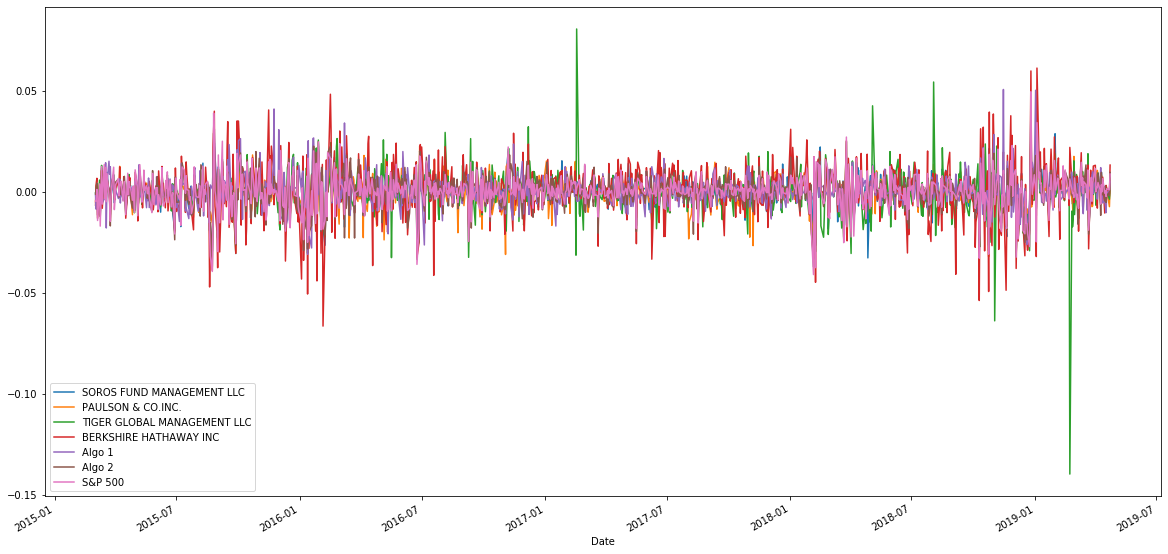

In [267]:
# Plot daily returns
# YOUR CODE HERE
joined_returns.plot(figsize=(20,10))

In [268]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + joined_returns).cumprod()
cumulative_returns.plot(figsize=(20,10))

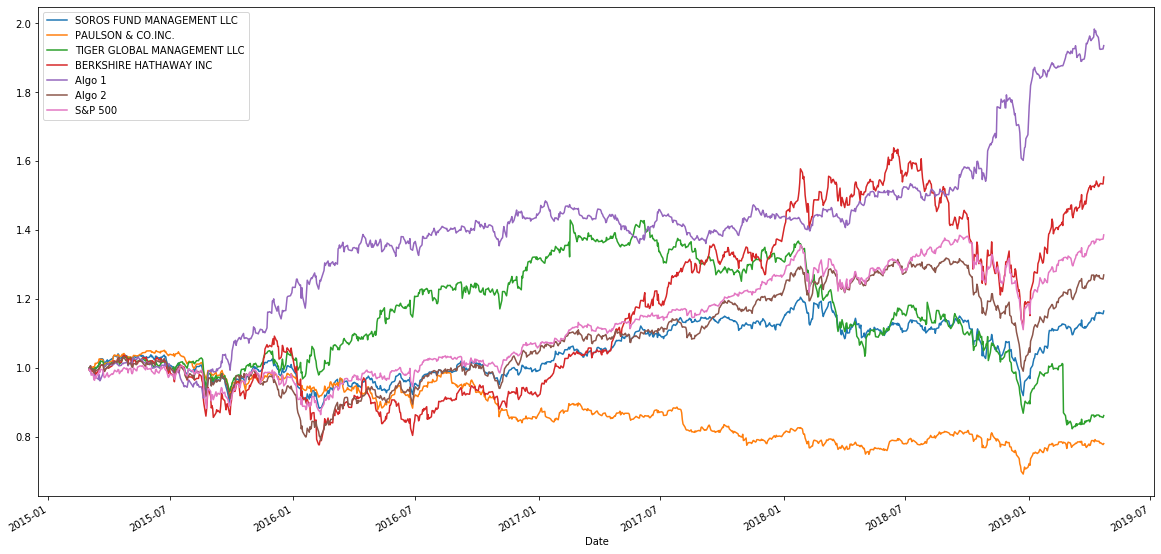

In [268]:
#### Performance Analysis Q & A
# Does any portfolio outperform the S&P 500?
# Berkshire Hathaway and Algo 1 both outperformed the S&P 500.

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

In [269]:
# Box plot to visually show risk
# YOUR CODE HERE
joined_returns.plot.box(figsize=(20,10))

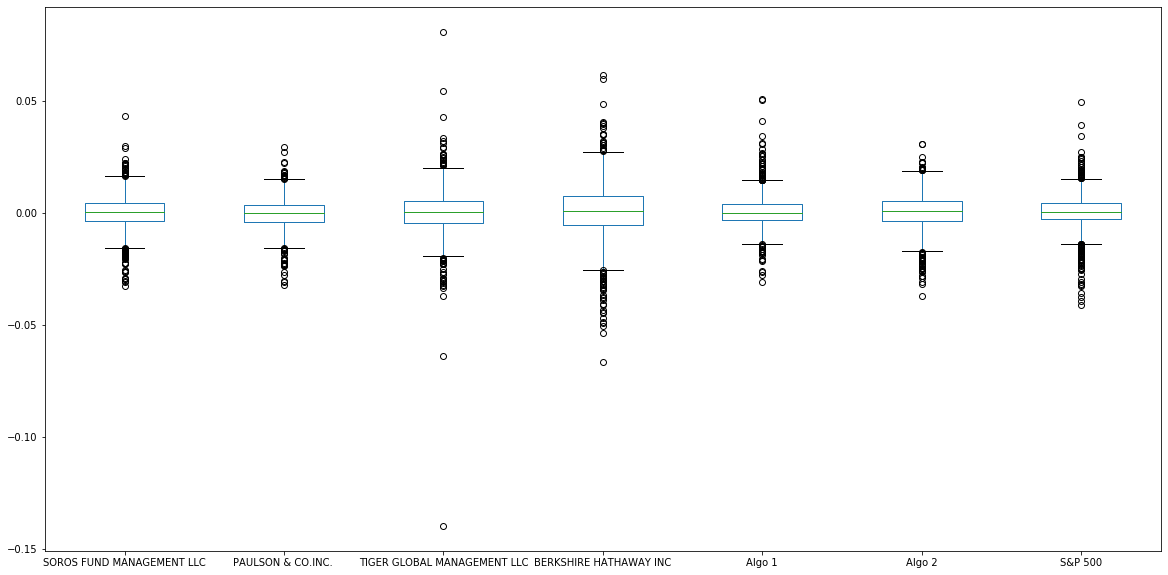

In [269]:
#### Risk Analysis Q & A
# Which box has the largest spread? Which has the smallest spread?
# Berkshire Hathaway had the largest spread. Paulson & Co. Inc had the smallest spread.

In [270]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# YOUR CODE HERE
daily_std = joined_returns.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [297]:
# Determine which portfolios are riskier than the S&P 500
# YOUR CODE HERE
for dev in daily_std:
    if dev > risk['S&P 500']:
        print(f'True')
    else:
        print(f'False')

In [297]:
#### Risk Analysis Q & A
# Which portfolios are riskier than the S&P 500?
# Both Tiger Global Management LLC and Berkshire Hathaway were riskier than the S&P 500. 

False
False
True
True
False
False
False


In [271]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE
annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
2. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?

In [272]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
# YOUR CODE HERE
joined_returns.rolling(window=21).std().plot(figsize=(20,10))

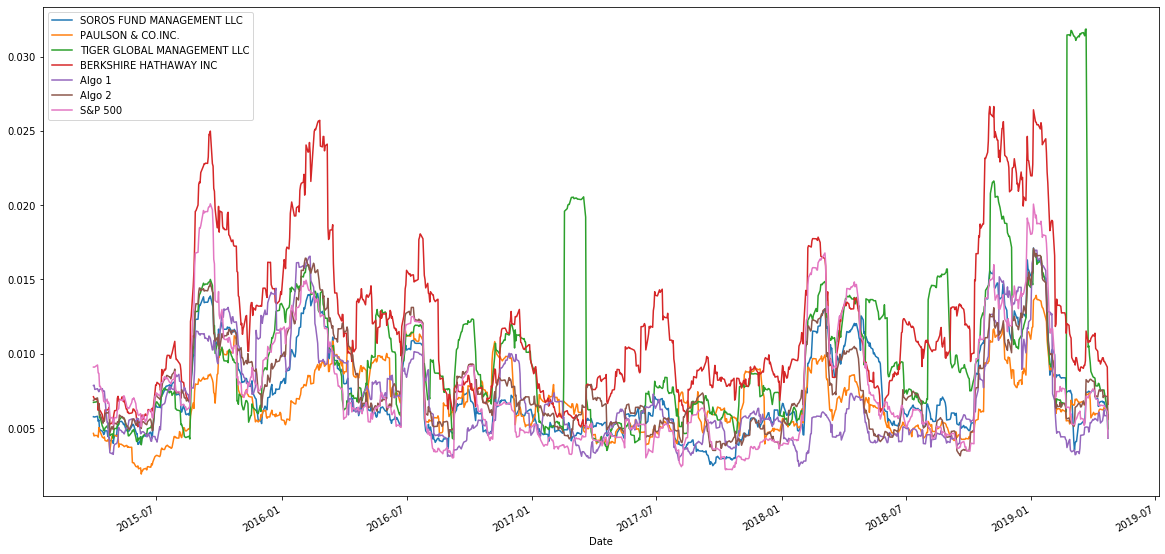

In [272]:
#### Rolling Statistics Q & A
# Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
# Generally speaking, yes, the risk for each portfolio increases at the same time as the risk increases for the S&P 500.

# Which returns most closely mimic the S&P?

# Does the portfolio seem sensitive to movements in the S&P 500?

In [273]:
# Construct a correlation table
# YOUR CODE HERE

In [273]:
combined_corr = joined_returns.corr()
combined_corr

In [273]:
#### Rolling Statistics Q & A
# Which returns most closely mimic the S&P?
# Algorithm 2 most closely mimics the S&P 500, although the Soros Fund Management is a close 2nd. 
# Does the portfolio seem sensitive to movements in the S&P 500?

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


In [274]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
# YOUR CODE HERE

# Calculate 21-day rolling covariance of BHI vs. S&P 500 and plot the data
rolling_bhi_covariance = joined_returns['BERKSHIRE HATHAWAY INC'].rolling(window=21).cov(joined_returns['S&P 500'])

# Calculate 21-day rolling variance of S&P 500
rolling_variance = joined_returns['S&P 500'].rolling(window=21).var()

# Calculate 21-day rolling beta of BHI and plot the data
rolling_bhi_beta = rolling_bhi_covariance / rolling_variance
rolling_bhi_beta.plot(figsize=(20,10))

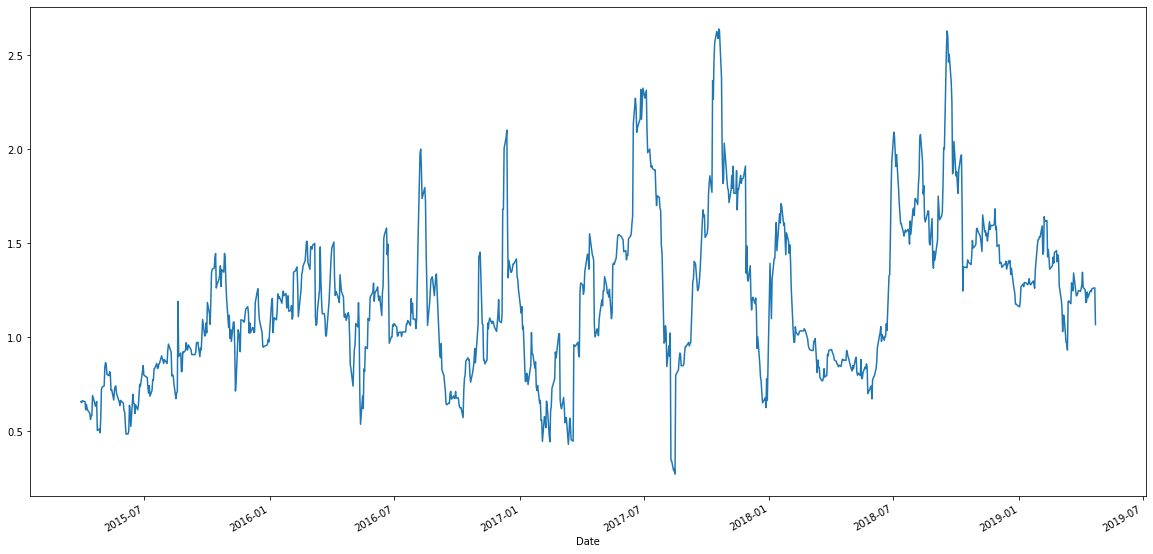

In [274]:
#### Rolling Statistics Q & A
# Does the portfolio seem sensitive to movements in the S&P 500?
# Yes, Berkshire Hathaway has a beta of 1 or larger for a majority of days in this rolling plot, which indicates a higher sensitivity.

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

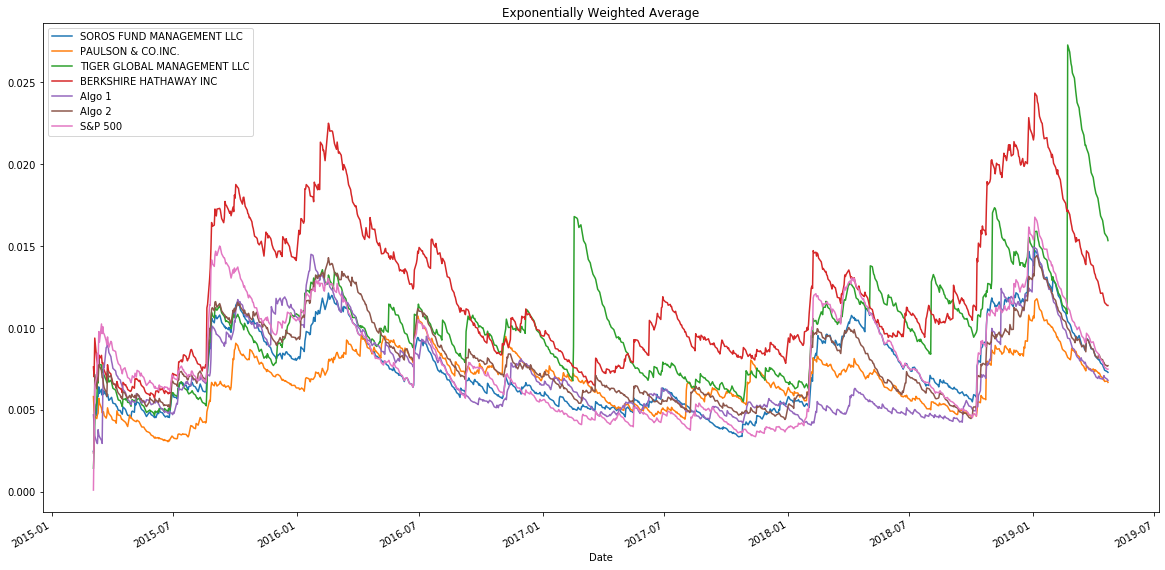

In [25]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [277]:
# Annualized Sharpe Ratios
# YOUR CODE HERE
sharpe_ratios = (joined_returns.mean() * 252) / (joined_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

In [278]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind='bar')

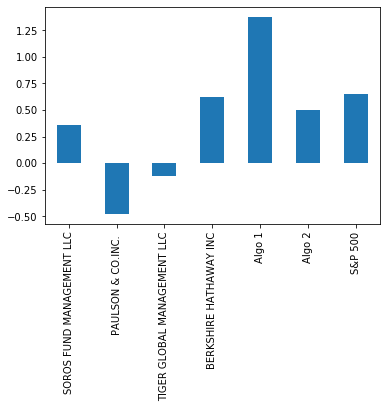

In [278]:
#### Plot Sharpe Ratios Q & A
# Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.
# Algorithm 1 outperforms both the market and whale portfolios. 

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [279]:
# Read the first stock
# YOUR CODE HERE
amd_returns_csv = Path("Resources/amd_historical.csv")
amd_returns = pd.read_csv(amd_returns_csv)
amd_returns.set_index(pd.to_datetime(amd_returns['Date'], infer_datetime_format=True), inplace=True)
amd_returns.drop(columns=['Date'], inplace=True)
amd_returns.head()

,Symbol,Close
Date,,
2018-05-01,AMD,11.13
2018-05-02,AMD,10.97
2018-05-03,AMD,10.93
2018-05-04,AMD,11.28
2018-05-07,AMD,11.59


In [280]:
# Read the second stock
# YOUR CODE HERE
mrk_returns_csv = Path("Resources/mrk_historical.csv")
mrk_returns = pd.read_csv(mrk_returns_csv)
mrk_returns.set_index(pd.to_datetime(mrk_returns['Date'], infer_datetime_format=True), inplace=True)
mrk_returns.drop(columns=['Date'], inplace=True)
mrk_returns.head()

,Symbol,Close
Date,,
2018-05-01,MRK,57.98
2018-05-02,MRK,57.30
2018-05-03,MRK,57.53
2018-05-04,MRK,57.75
2018-05-07,MRK,57.38


In [281]:
# Read the third stock
# YOUR CODE HERE
cmg_returns_csv = Path("Resources/cmg_historical.csv")
cmg_returns = pd.read_csv(cmg_returns_csv)
cmg_returns.set_index(pd.to_datetime(cmg_returns['Date'], infer_datetime_format=True), inplace=True)
cmg_returns.drop(columns=['Date'], inplace=True)
cmg_returns.head()

,Symbol,Close
Date,,
2018-05-01,CMG,426.01
2018-05-02,CMG,421.22
2018-05-03,CMG,419.42
2018-05-04,CMG,420.41
2018-05-07,CMG,419.62


In [282]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE
my_joined_returns = pd.concat([amd_returns, mrk_returns, cmg_returns], axis="rows", join="inner")
my_joined_returns.head()

,Symbol,Close
Date,,
2018-05-01,AMD,11.13
2018-05-02,AMD,10.97
2018-05-03,AMD,10.93
2018-05-04,AMD,11.28
2018-05-07,AMD,11.59


In [283]:
# Reset the index
# YOUR CODE HERE
my_joined_returns = my_joined_returns.reset_index()
my_joined_returns.head()

,Date,Symbol,Close
0,2018-05-01,AMD,11.13
1,2018-05-02,AMD,10.97
2,2018-05-03,AMD,10.93
3,2018-05-04,AMD,11.28
4,2018-05-07,AMD,11.59


In [284]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE
my_joined_returns = pd.pivot_table(my_joined_returns, index='Date', columns='Symbol', values='Close')
my_joined_returns

Symbol,AMD,CMG,MRK
Date,,,
2018-05-01,11.13,426.01,57.98
2018-05-02,10.97,421.22,57.30
2018-05-03,10.93,419.42,57.53
2018-05-04,11.28,420.41,57.75
2018-05-07,11.59,419.62,57.38
...,...,...,...
2019-04-24,28.46,709.75,74.73
2019-04-25,27.66,678.07,76.34
2019-04-26,27.88,676.79,76.63


In [285]:
# Drop Nulls
# YOUR CODE HERE
my_joined_returns = my_joined_returns.dropna()
my_joined_returns.head()

Symbol,AMD,CMG,MRK
Date,,,
2018-05-01,11.13,426.01,57.98
2018-05-02,10.97,421.22,57.30
2018-05-03,10.93,419.42,57.53
2018-05-04,11.28,420.41,57.75
2018-05-07,11.59,419.62,57.38


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [286]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE
my_daily_returns = my_joined_returns.pct_change()
my_portfolio_returns = my_daily_returns.dot(weights)
my_portfolio_returns = my_portfolio_returns.dropna()
my_portfolio_returns.name = "Custom"
my_portfolio_returns.head() 

Date
2018-05-02   -0.012449
2018-05-03   -0.001302
2018-05-04    0.012735
2018-05-07    0.006399
2018-05-08    0.000786
Name: Custom, dtype: float64

## Join your custom portfolio returns to the DataFrame that contains all of the portfolio returns

In [287]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE
all_joined_returns = pd.concat([joined_returns, my_portfolio_returns], axis="columns", join="inner")
all_joined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2018-05-02,-0.007923,-0.011448,-0.019454,0.000131,0.005558,0.001319,-0.007206,-0.012449
2018-05-03,-0.005584,-0.010606,0.008883,0.000822,0.008960,-0.002614,-0.002254,-0.001302
2018-05-04,0.013363,0.006909,0.042637,0.008794,0.000648,0.008404,0.012811,0.012735
2018-05-07,0.008047,0.002994,0.010428,0.008954,0.006150,0.003798,0.003458,0.006399
2018-05-08,-0.003793,-0.010821,-0.001354,-0.000946,-0.001733,0.001310,-0.000266,0.000786


In [288]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
all_joined_returns = all_joined_returns.dropna()
all_joined_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2018-05-02,-0.007923,-0.011448,-0.019454,0.000131,0.005558,0.001319,-0.007206,-0.012449
2018-05-03,-0.005584,-0.010606,0.008883,0.000822,0.008960,-0.002614,-0.002254,-0.001302
2018-05-04,0.013363,0.006909,0.042637,0.008794,0.000648,0.008404,0.012811,0.012735
2018-05-07,0.008047,0.002994,0.010428,0.008954,0.006150,0.003798,0.003458,0.006399
2018-05-08,-0.003793,-0.010821,-0.001354,-0.000946,-0.001733,0.001310,-0.000266,0.000786
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000491
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,-0.029515
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.004722


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [289]:
# Risk
# YOUR CODE HERE
total_volatility = all_joined_returns.std() * np.sqrt(252)
total_volatility.sort_values(inplace=True)
total_volatility

PAULSON & CO.INC.              0.117386
Algo 1                         0.132099
Algo 2                         0.137833
SOROS FUND MANAGEMENT LLC      0.145918
S&P 500                        0.150905
TIGER GLOBAL MANAGEMENT LLC    0.234438
BERKSHIRE HATHAWAY INC         0.243474
Custom                         0.289246
dtype: float64

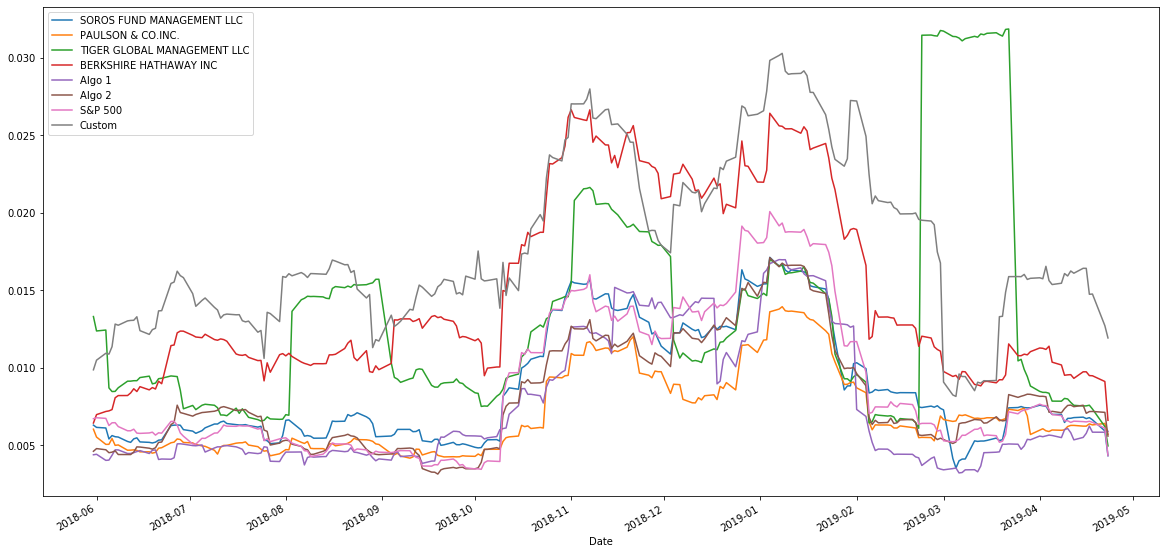

In [290]:
# Rolling
# YOUR CODE HERE
all_joined_returns.rolling(window=21).std().plot(figsize=(20,10))

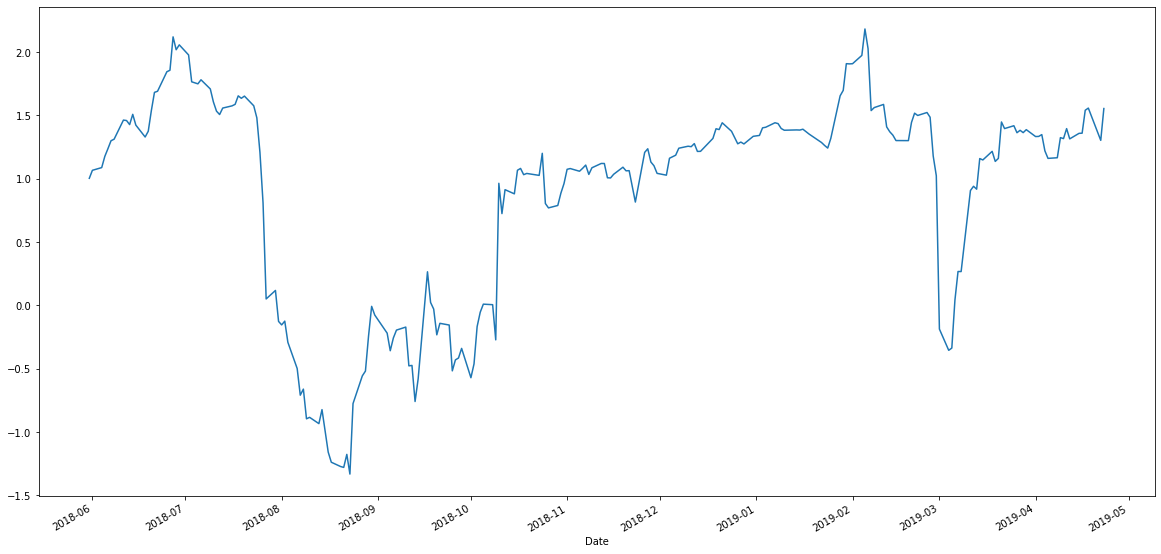

In [291]:
# Beta
# YOUR CODE HERE
# Calculate 21-day rolling covariance of Custom vs. S&P 500 and plot the data
rolling_custom_covariance = all_joined_returns['Custom'].rolling(window=21).cov(all_joined_returns['S&P 500'])

# Calculate 21-day rolling variance of S&P 500
rolling_variance_sp500 = all_joined_returns['S&P 500'].rolling(window=21).var()

# Calculate 21-day rolling beta of BHI and plot the data
rolling_custom_beta = rolling_custom_covariance / rolling_variance_sp500
rolling_custom_beta.plot(figsize=(20,10))

In [294]:
# Annualized Sharpe Ratios
# YOUR CODE HERE
all_sharpe_ratios = (all_joined_returns.mean() * 252) / (all_joined_returns.std() * np.sqrt(252))
all_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.470071
PAULSON & CO.INC.              0.211396
TIGER GLOBAL MANAGEMENT LLC   -0.764089
BERKSHIRE HATHAWAY INC         0.241674
Algo 1                         2.188740
Algo 2                         0.241649
S&P 500                        0.756139
Custom                         2.325076
dtype: float64

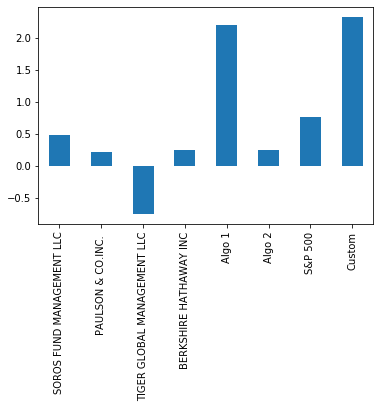

In [295]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
all_sharpe_ratios.plot(kind='bar')

## Include correlation analysis to determine which stocks (if any) are correlated

In [296]:
# YOUR CODE HERE
all_combined_corr = all_joined_returns.corr()
all_combined_corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.789248,0.486833,0.812835,0.333784,0.856266,0.874394,0.583691
PAULSON & CO.INC.,0.789248,1.000000,0.483747,0.640500,0.348072,0.772018,0.765013,0.564758
TIGER GLOBAL MANAGEMENT LLC,0.486833,0.483747,1.000000,0.326064,0.114198,0.409408,0.487854,0.288899
BERKSHIRE HATHAWAY INC,0.812835,0.640500,0.326064,1.000000,0.327102,0.781969,0.848321,0.560162
Algo 1,0.333784,0.348072,0.114198,0.327102,1.000000,0.361293,0.284470,0.202565
Algo 2,0.856266,0.772018,0.409408,0.781969,0.361293,1.000000,0.873864,0.609482
S&P 500,0.874394,0.765013,0.487854,0.848321,0.284470,0.873864,1.000000,0.627127
Custom,0.583691,0.564758,0.288899,0.560162,0.202565,0.609482,0.627127,1.000000


In [ ]:
#### Custom Portfolio Analysis Q & A
# How does your portfolio fair?
# It not only beats the market (S&P 500), it also outperforms both the algorithms and whale portfolios. Interestingly it carries more risk than the other options, but with a great return, it justifies it's choice as the top investment portfolio.
# I only wish I had this portfolio during the time frame, and was able to reap the rewards.. lol. 